# Simulation using Python 2
### Monte Carlo Simulation
[Numpy Random website](https://docs.scipy.org/doc/numpy-1.14.1/reference/routines.random.html)

In [22]:
#Runs these import commands
import numpy.random as rnd
import math as m
import numpy as np
import matplotlib.pyplot as plt

**Scenario M1: Estimate PI**

Consider a quarter circle inscribed inside a unit square.  Radius of cirle is 1.

$Area_{quartercircle} = \pi /4$ and $Area_{square} = 1$

Now, suppose we randomly sample points, then $Area_{quartercircle} \approx \text{number_of_points_inside_circle}$

$\pi = 4*$ number_of_points_inside_circle / n


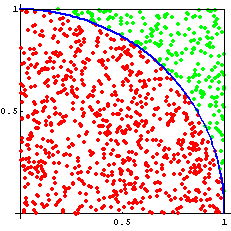


**Algorithm: **
```
for i in range(n):
  Generate x ~ Unif[0,1]
  Generate Y ~ Unif[0,1]
  if (x^2 + y^2) <=1:
    count_in_circle =  count_in_circle + 1

Estimate PI as 4*count_in_circle/n
```

In [2]:
#Write your code here
n=500
count_in_circle=0

for i in range(n):
    x=rnd.uniform(0,1)
    y= rnd.uniform(0,1)
    if(x**2 + y**2)<=1 :
     count_in_circle=count_in_circle+1
print(4*count_in_circle/n)

 #EstimatePIas4*count_in_circle/n


3.152


**Scenario M2** A project consists of three tasks: A, B and C. Task A and B can be done in parallel, while C can being only after A and B are completed. The time for task A, is exponentially distributed with mean 10 hours; the time for task B is uniformly distributed between 6 and 14 hours; and the time for task C, is normally distributed with mean 10 hours and std. dev. 3.
What is the probability that the project will be completed within 22 hours?

*Algorithm*
```
for i in range(n):
  Generate A ~ Expo(mean=10 hours)
  Generate B ~ Unif[6, 14]
  Generate C ~ Normal(mean=10, s.d=3)
  Totaltime = max(A,B) + C
  if Totaltime <= 22:
    count = count + 1

Estimate Probability as count /n
```

In [3]:
n=1000
count=0
for i in range(n):
    x=rnd.exponential(10)
    y=rnd.uniform(6,14)
    z=rnd.normal(10,3)
    totaltime=max(x,y)+z
    if totaltime<=22:
      count=count+1
print(count/n)


0.488


In [4]:
#Write your code here
n=500
count = 0
for i in range(n):
    x=rnd.exponential(10)
    y=rnd.uniform(6,14)
    z=rnd.normal(10,3)
    totaltime = max(x,y)+z
    if totaltime <= 22:
       count=count+1
print('estimate probability as',count/n)

estimate probability as 0.5


.**Scenario M3**

Consider the maze shown. There are 3 cells (Cell 1, Cell 2, Cell 3) and two deadly and permanent outcomes (Death by poison and Death by drowning). In each time step, the rat enters a Cell i, and then exits the cell by picking one of the doors (shown as gaps in the figure) at random. Rat is initially in Cell 1. Answer the following using Monte Carlo Simulation.
(a) Estimate the probability that the rat dies by poison.
(b) What is the expected duration the rat lives?

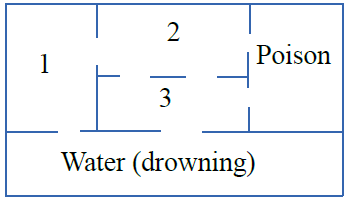

*Algorithm*
```
StepsInRounds=[]
Poisoncount = 0

for i in range(n): #We will simulate rat movement for n rounds.
  currentCell=1
  timestep=0
  while (currentCell not in [4, 5]):
    timestep = timestep + 1
    if currentCell == 1:
      #choose cell 1 or 5 randomly  #5 can indicate Water cell
    elif currentCell == 2:
      #choose cell 1 or 3 or 4 #4 can indicate Poison cell
    else: #currentCell is 3
      #choose cell 2 or 4 or 5
  
    if currentCell == 4:
      Poisoncount = Poisoncount+1

  StepsInRounds.append(timestep)

##print the results
```


In [5]:
import random

def simulate_maze():
    rat_cell = 1  # Start in Cell 1
    time_steps = 0
    while True:
        # Simulate the rat's random movement
        if rat_cell == 1:
            next_cell = random.choice([1, 5])  # Randomly choose between Cell 1 and Cell 5
        elif rat_cell == 2:
            next_cell = random.choice([1, 3,4])  # Randomly choose between Cell 1 and Cell 3 and 4
        else:
            # The rat is in Cell 3, and there's only one way to go
            next_cell = random.choice([2, 4,5])

        time_steps += 1
        rat_cell = next_cell

        # Check if the rat has died by poison or reached the maximum time steps
        if rat_cell == 1:
            return "Poison"  # Rat died by poison
        elif rat_cell == 3:
            return "Drown"   # Rat died by drowning
        elif time_steps >= 100:  # Maximum number of time steps to survive
            return "Survive"

def monte_carlo_simulation(num_simulations):
    poison_count = 0
    total_time_steps = 0

    for _ in range(num_simulations):
        result = simulate_maze()
        if result == "Poison":
            poison_count += 1
        elif result == "Survive":
            total_time_steps += 100  # Maximum time steps if the rat survives

    probability_death_by_poison = poison_count / num_simulations
    expected_duration = total_time_steps / num_simulations

    return probability_death_by_poison, expected_duration

# Run Monte Carlo simulation with a large number of trials
num_simulations = 100000
probability, expected_duration = monte_carlo_simulation(num_simulations)

print(f"Estimated Probability of Death by Poison: {probability}")
print(f"Estimated Expected Duration of Life: {expected_duration} time steps")


Estimated Probability of Death by Poison: 0.74732
Estimated Expected Duration of Life: 0.0 time steps


In [6]:
StepsInRounds=[]
Poisoncount=0
n=10000
for i in range(n):#We will simulate rat movement for n rounds.
    currentCell=1
    timestep=0
    while(currentCell not in [4,5]):
      timestep = timestep + 1
      if currentCell == 1:
         currentCell=rnd.choice([1,5],p=[0.5,0.5])
      elif currentCell == 2:
          currentCell=rnd.choice([1,3,4],p=[0.50,0.25,0.50])
      else :
          currentCell=rnd.choice( [2,4,5],p=[0.25,0.5,0.50])
      if currentCell == 4:
         Poisoncount =Poisoncount+1

      StepsInRounds.append(timestep)
t = Poisoncount / n
print("Estimated probability of death by poison:", t)



Estimated probability of death by poison: 0.0


**Exercise**

E1. Consider the maze shown above. There are 3 cells (Cell 1, Cell 2, Cell 3) and two deadly and permanent outcomes (Death by poison and Death by drowning). When rat enters Cell i, he wanders around within the cell for Xi minutes where Xi is Gamma(4, 3i) , and then exits the cell by picking one of the doors (shown as gaps in the figure) at random. Rat is initially in Cell 1. Answer the following using Monte Carlo Simulation.
(a) Estimate the probability that the rat dies by poison.
(b) What is the expected duration the rat lives?


In [7]:
import random
import numpy as np

def simulate_maze():
    rat_cell = 1  # Start in Cell 1
    total_time_steps = 0

    while True:
        # Simulate the rat's random time spent in the current cell based on Gamma distribution
        if rat_cell == 1:
            time_in_cell = np.random.gamma(4, 3)
        elif rat_cell == 2:
            time_in_cell = np.random.gamma(4, 6)  # Note that 3i = 3 * 2 = 6 for Cell 2
        else:
            time_in_cell = np.random.gamma(4, 9)  # Similarly, 3i = 3 * 3 = 9 for Cell 3

        total_time_steps += time_in_cell

        # Simulate the rat's exit from the current cell
        if rat_cell == 1:
            next_cell = random.choice([1, 5])  # Randomly choose between Cell 1 and Cell 5
        elif rat_cell == 2:
            next_cell = random.choice([1, 3,4])  # Randomly choose between Cell 2 and Cell 3
        else:
            # The rat is in Cell 3, and there's only one way to go
            next_cell = 3

        rat_cell = next_cell

        # Check if the rat has died by poison or reached the maximum time steps
        if rat_cell == 1:
            return "Poison"  # Rat died by poison
        elif rat_cell == 3:
            return "Drown"   # Rat died by drowning
        elif total_time_steps >= 100:  # Maximum time steps to survive
            return "Survive"

def monte_carlo_simulation(num_simulations):
    poison_count = 0
    total_time_steps = 0

    for _ in range(num_simulations):
        result = simulate_maze()
        if result == "Poison":
            poison_count += 1
        elif result == "Survive":
            total_time_steps += 100  # Maximum time steps if the rat survives

    probability_death_by_poison = poison_count / num_simulations
    expected_duration = total_time_steps / num_simulations

    return probability_death_by_poison, expected_duration

# Run Monte Carlo simulation with a large number of trials
num_simulations = 100000
probability, expected_duration = monte_carlo_simulation(num_simulations)

print(f"Estimated Probability of Death by Poison: {probability}")
print(f"Estimated Expected Duration of Life: {expected_duration:.2f} minutes")



Estimated Probability of Death by Poison: 0.50062
Estimated Expected Duration of Life: 0.00 minutes



E2. Newspaper vendor at a railway station buys newspaper at Rs. 3.50 and sells it at Rs.4.50. At the end of the day, the unsold newspapers are sold to raddhiwala for Rs.0.25. Estimate the xpected profit if the vendor buys 40 newspapers.

Compare the results when:

*   Demand for newspaper is Poisson random variable with mean 50
*   Demand for newspaper is Normal random variable with mean 50 & s.d. 5

In [39]:
import numpy as np
x = 3.50  # Cost price per newspaper
y = 4.50  # Selling price per newspaper
z = 0.25  # Price when selling unsold newspapers to raddhiwala
num_newspapers = 40  # Number of newspapers bought
mean_demand = 50  # Mean demand
# Simulate the profit for a large number of days
num_simulations = 1000
profits = []

for _ in range(num_simulations):
    demand = np.random.poisson(mean_demand)
    if demand <= num_newspapers:
        profit = (y - x) * demand
    else:
        # Sell only the available newspapers, scrap the rest
        profit = (y - x) * num_newspapers - (demand - num_newspapers) * (x - z)

    profits.append(profit)

# Calculate the expected profit
expected_profit = np.mean(profits)
print(expected_profit)
print(f"Expected profit with Poisson demand (mean={mean_demand}) for {num_newspapers} newspapers: Rs. {expected_profit:.2f}")


6.98275
Expected profit with Poisson demand (mean=50) for 40 newspapers: Rs. 6.98


In [38]:
x=3.5  # Cost price per newspaper
y=4.5  # Selling price per newspaper
z=0.25 # Price when selling unsold newspapers to raddhiwala
num_newspapers=40
mean_demand=50
sd=5
num_simulations=1000
profits=[]
for _ in range(num_simulations):
    demand = np.random.normal(mean_demand,sd)
    if demand <= num_newspapers:
        profit = (y - x) * demand
    else:
        # Sell only the available newspapers, scrap the rest
        profit = (y - x) * num_newspapers - (demand - num_newspapers) * (x - z)

    profits.append(profit)

# Calculate the expected profit
expected_profit = np.mean(profits)
print(expected_profit)



6.7713727696781225


conclusion :- here we see that if demand fallow poisson distribution the profit is greater than the ,if demand fallw the normal distribution